In [11]:
pip install openpyxl

   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/250.9 kB 262.6 kB/s eta 0:00:01
   -------------- ------------------------ 92.2/250.9 kB 581.0 kB/s eta 0:00:01
   ---------------------------------------  245.8/250.9 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------  245.8/250.9 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------  245.8/250.9 kB 1.4 MB/s eta 0:00:01
   -------------------------------------- 250.9/250.9 kB 810.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

In [3]:
df = pd.read_excel('sales_data.xlsx')

In [39]:
df.head()

,Order ID,Order Line No,Date Shipped,Item ID,Qty Ordered,Line Status,Order Date,Due Date,Customer ID,Qty Shipped,UM,Qty Returned,Shipment ID,Unit Price,Total Price,Qty Invoiced,Ship Warehouse,Ship To,Order Release Date,Ship Code
0,A0001,1,2024-01-08,I0001,5,Complete,2023-11-29,2023-11-29,10337,5.0,C5,0,SH0001,35.65,178.25,5.0,LPI,1,2023-11-29 08:15:34.917,DVBL
1,A0002,9,2024-01-08,I0002,4,Complete,2023-12-05,2023-12-05,10337,4.0,C5,0,SH0002,158.10,632.40,4.0,LPI,1,2023-12-05 08:16:13.473,DVBL
2,A0003,3,2024-01-11,I0003,20,Complete,2023-12-13,2023-12-13,10352,20.0,C5,0,SH0003,87.85,1757.00,20.0,LPI,1,2023-12-13 08:15:14.177,FMDO
3,A0004,7,2024-01-11,I0002,10,Complete,2023-12-13,2023-12-13,10343,10.0,C5,0,SH0004,158.10,1581.00,10.0,LPI,1,2023-12-13 08:15:14.417,FMDO
4,A0004,8,2024-01-10,I0004,3,Complete,2023-12-13,2023-12-13,10343,3.0,C12,0,SH0005,302.04,906.12,3.0,LPI,1,2023-12-13 08:15:14.423,FMDO


In [40]:
df.tail()

,Order ID,Order Line No,Date Shipped,Item ID,Qty Ordered,Line Status,Order Date,Due Date,Customer ID,Qty Shipped,UM,Qty Returned,Shipment ID,Unit Price,Total Price,Qty Invoiced,Ship Warehouse,Ship To,Order Release Date,Ship Code
23291,A12870,1,2024-12-31,I0026,20,Complete,2024-12-31,2024-12-31,12594,20.0,C5,0,SH22444,30.40,608.00,20.0,LPI,1,NaT,OWPD
23292,A12871,3,2024-12-31,I0092,10,Complete,2024-12-31,2024-12-31,11264,10.0,C10,0,SH22445,129.60,1296.00,10.0,DWN,1,NaT,OWPD
23293,A12872,1,2024-12-31,I0026,25,Complete,2024-12-31,2024-12-31,12025,25.0,C5,0,SH22446,25.75,643.75,25.0,LPI,1,NaT,OWPD
23294,A12873,1,2024-12-31,I0026,50,Complete,2024-12-31,2024-12-31,11424,44.0,C5,0,SH22447,27.85,1225.40,44.0,MSL,1,NaT,OWPD
23295,A12873,1,2024-12-31,I0026,50,Complete,2024-12-31,2024-12-31,11424,6.0,C5,0,SH22447,27.85,167.10,6.0,MSL,1,NaT,OWPD


In [41]:
df.isnull().sum()

Order ID                  0
Order Line No             0
Date Shipped              0
Item ID                   0
Qty Ordered               0
Line Status               0
Order Date                0
Due Date                  0
Customer ID               0
Qty Shipped               0
UM                        0
Qty Returned              0
Shipment ID               0
Unit Price                0
Total Price               0
Qty Invoiced              0
Ship Warehouse            0
Ship To                   0
Order Release Date    20665
Ship Code                 1
dtype: int64

removing the column with null values

In [43]:
df.drop(columns=["Order Release Date"], inplace=True)

checking the duplicate values

In [42]:
df.duplicated().sum()

101

deleting the duplictate values

In [47]:
df = df.drop_duplicates()

In [48]:
df.duplicated().sum()

0

In [52]:
df["Ship Code"].fillna('',inplace=True)

In [53]:
df.isnull().sum()

Order ID          0
Order Line No     0
Date Shipped      0
Item ID           0
Qty Ordered       0
Line Status       0
Order Date        0
Due Date          0
Customer ID       0
Qty Shipped       0
UM                0
Qty Returned      0
Shipment ID       0
Unit Price        0
Total Price       0
Qty Invoiced      0
Ship Warehouse    0
Ship To           0
Ship Code         0
dtype: int64

finding top 5 selling products

In [54]:
top_selling = (
    df.groupby('Item ID')['Qty Ordered']).sum().sort_values(ascending=False).head()
print(top_selling)

Item ID
I0026    32142
I0018    18395
I0011    16394
I0086    12027
I0058    11427
Name: Qty Ordered, dtype: int64


top returning customers

In [55]:
top_returning_customers = (
    df.groupby("Customer ID")["Qty Returned"]).sum().sort_values(ascending=False).head()
print(top_returning_customers)

Customer ID
10154    1
200      0
13204    0
13277    0
13276    0
Name: Qty Returned, dtype: int64


Visualization

In [56]:
import matplotlib .pyplot as plt
import seaborn as sns

C:\Users\M S I\AppData\Local\Temp\ipykernel_2256\3189556807.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_selling.index, y=top_selling.values, palette="Blues_r")


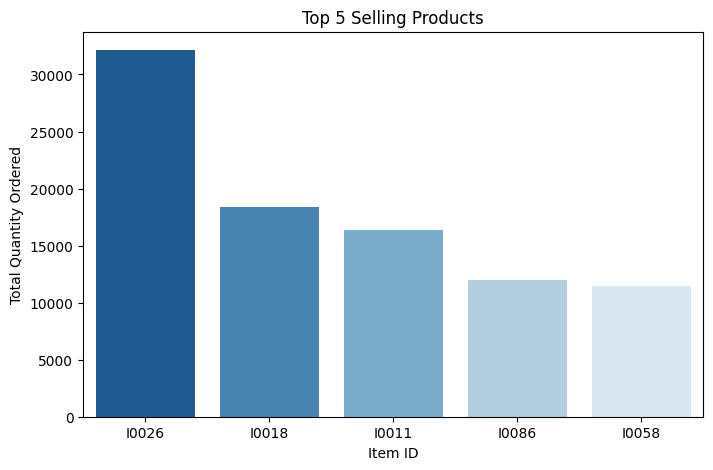

In [57]:
plt.figure(figsize=(8, 5))
sns.barplot(x=top_selling.index, y=top_selling.values, palette="Blues_r")
plt.xlabel("Item ID")
plt.ylabel("Total Quantity Ordered")
plt.title("Top 5 Selling Products")
plt.show()

C:\Users\M S I\AppData\Local\Temp\ipykernel_2256\3077959017.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_returning_customers.index, y=top_returning_customers.values, palette="Reds_d")


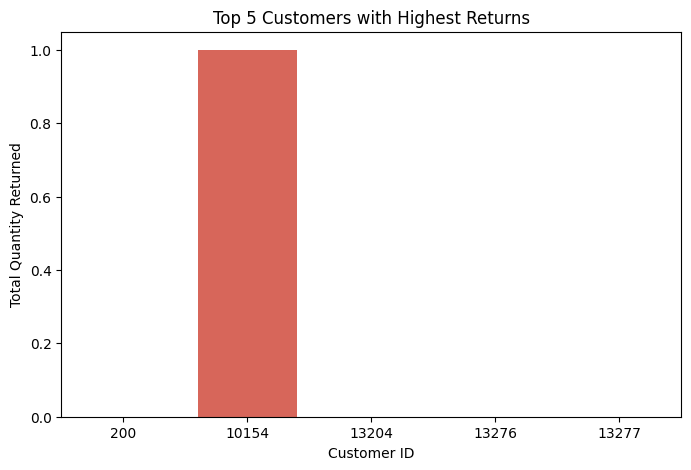

In [58]:
plt.figure(figsize=(8, 5))
sns.barplot(x=top_returning_customers.index, y=top_returning_customers.values, palette="Reds_d")
plt.xlabel("Customer ID")
plt.ylabel("Total Quantity Returned")
plt.title("Top 5 Customers with Highest Returns")
plt.show()